In [ ]:
#imports
import sys 
import pprint
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy.ndimage as filters

sys.path.append("./pythonlibs/")
import py_modules_load as py_load
import py_modules_fits as py_fit
import py_modules_calib as py_calib
import py_modules_plot as py_plot
import py_modules_enviroment as py_envir

In [ ]:
AllVDictonary = {}
FullCalib = {}

In [ ]:
# #Loads Raw Data
# path_list = ["../Data/Calibration/a1_2.05_Vpp/26.00V/Analysis.root"]
# if len(path_list)==0:
#     path_list = py_load.load_file_list()
    
# for enum,path in enumerate(path_list):
#     treenames = []
#     branchnames = ["EventID"]
#     for i_event in range(1,101):
#         treenames.append("Event;{}".format(i_event))

#     for i_channel in range(0,16):
#         branchnames.append("Data_ch{}".format(i_channel))
#     branchnames.append("Trigger_data_g0")
#     branchnames.append("Trigger_data_g1")

#     result = py_load.read_root_file(path, treenames, branchnames)
#     AllDictonary[26+0.25*enum] = result

In [ ]:
#Loads Analysis Data
for id in ["a1","a2","a3","a4","a5","a6","d2","d4","d6"]:
    path_list = []
    result = {}
    AllVDictonary = {}
    for setvolt in range(2600,3001,25):
        path_list.append("../Data/Calibration/{}_2.05_Vpp/{:.2f}V/Analysis.root".format(id,setvolt/100))

    for enum,path in enumerate(path_list):
        treenames = ["TTree_Analysis_PHD;1","TTree_Analysis_TTS;1","TTree_Analysis_Charge;1"]
        bname = ["PulseHeight","TTS","Charge"]
        for i_tree,tree in enumerate(treenames):
            branchnames = []
            for i_channel in range(0,16):
                branchnames.append("{}_Ch{}".format(bname[i_tree],i_channel))

            result = py_load.read_root_file(path, [tree], branchnames)
            if result ==False:
                continue
            if (26+0.25*enum) not in AllVDictonary:
                AllVDictonary.update({(26+0.25*enum):result})
            else:
                AllVDictonary[26+0.25*enum].update(result)

    FullCalib[id] = (AllVDictonary)

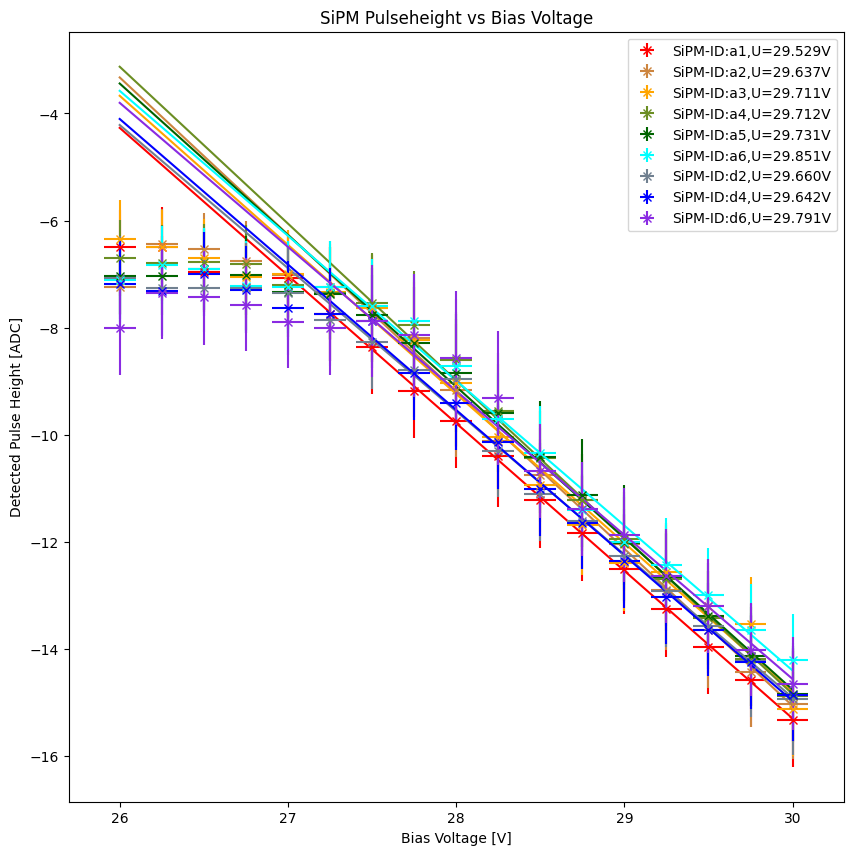

In [8]:
ped_list = []
ped_err_list = []
spe_list = []
spe_err_list = []
dpe_list = []
dpe_err_list = []
id_list = ["a1","a2","a3","a4","a5","a6","d2","d4","d6"]
for id in id_list:
    volt,pedestal,spe,dpe,ped_err,spe_err,dpe_err = py_calib.GetCalibrationCurve(FullCalib[id],False,id)
    ped_list.append(pedestal)
    ped_err_list.append(ped_err)
    spe_list.append(spe)
    spe_err_list.append(spe_err)
    dpe_list.append(dpe)
    dpe_err_list.append(dpe_err)

py_calib.GetVoltageValues(-14,[volt,spe_list,np.abs(spe_err_list)],id_list)



In [ ]:
# Get Enviroment Data
# py_envir.GetVoltageStability("../Data/Calibration/VoltTemp/voltage.log")